In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2023-02-22 21:56:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2023-02-22 21:56:15 (11.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
# observación: la instalación de seaborn puede tomar algunos minutos
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.10

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         127 KB  anaconda
    certifi-2022.12.7          |  py310h06a4308_0         151 KB  anaconda
    openssl-1.1.1s             |       h7f8727e_0         3.8 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> a

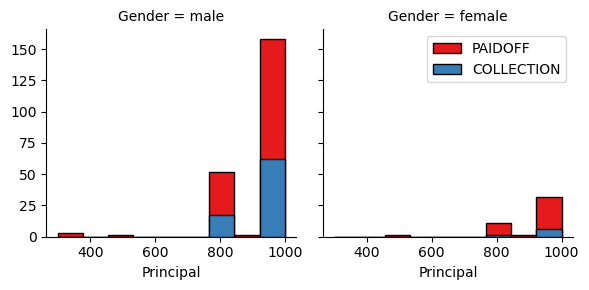

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

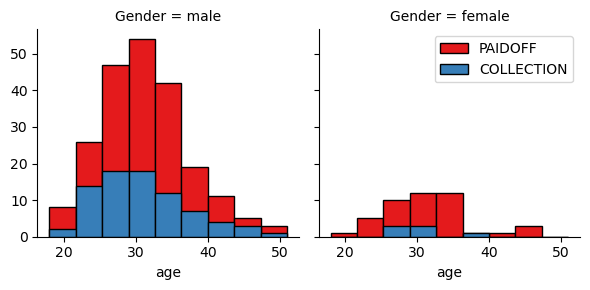

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

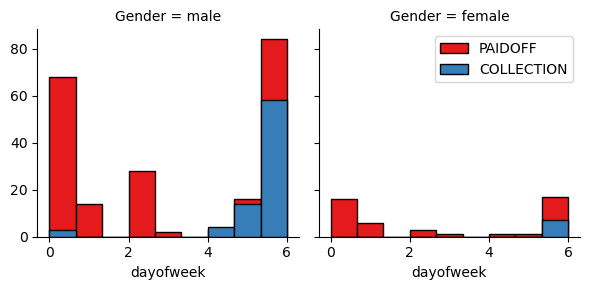

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # defualt random state 
####X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64285714, 0.58571429, 0.65714286, 0.57142857, 0.71428571,
       0.64285714, 0.7       , 0.71428571, 0.71428571, 0.68571429])

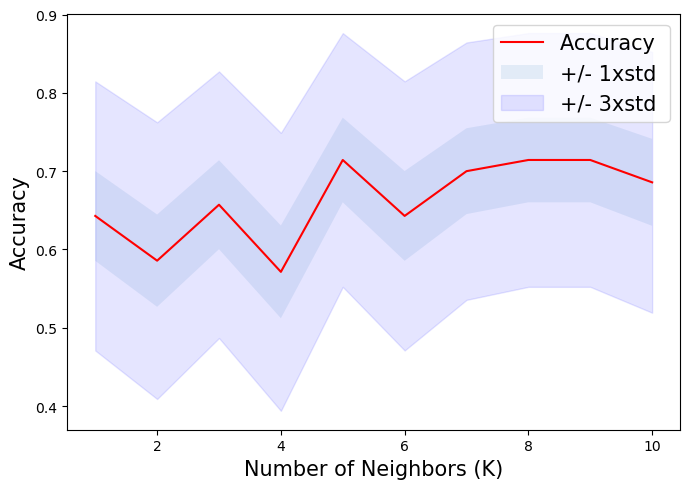

In [23]:
plt.figure(figsize=(7, 5))
plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
#---------------------------------
plt.rc('legend',fontsize=15)
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy', fontsize=15 )
plt.xlabel('Number of Neighbors (K)', fontsize=15)
plt.tight_layout()
plt.show()

In [24]:
clf = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
yhat=clf.predict(X_test)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.29      0.29      0.29        21
     PAIDOFF       0.69      0.69      0.69        49

    accuracy                           0.57        70
   macro avg       0.49      0.49      0.49        70
weighted avg       0.57      0.57      0.57        70



In [25]:
clf_KNN = KNeighborsClassifier(n_neighbors = 4).fit(X,y)
clf_KNN

KNeighborsClassifier(n_neighbors=4)

In [26]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=a921e7a6bd51406c4636100e1bd0eb47ab354c44081662402a5ef7bac505c864
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz
import pydotplus
import collections

In [28]:
LoanTree = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [29]:
print(LoanTree.fit(X,y))
print(LoanTree.get_depth())

DecisionTreeClassifier(criterion='entropy', random_state=0)
15


In [30]:
DF = pd.DataFrame(Feature)
DF.head()
DF.columns.values

array(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'], dtype=object)

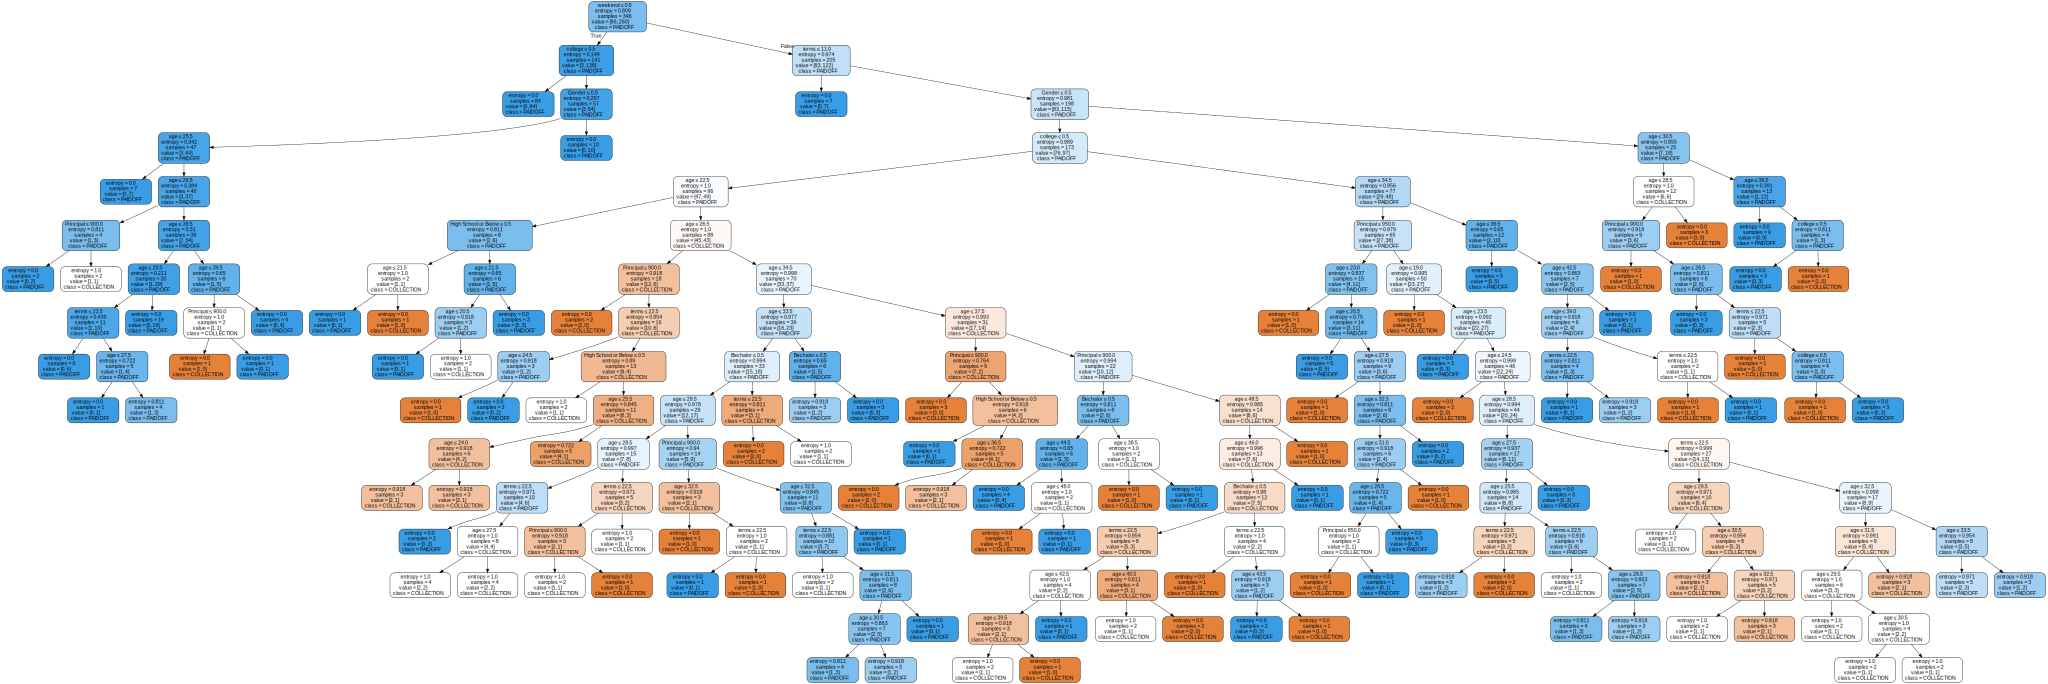

In [31]:
dot_data = tree.export_graphviz(LoanTree, out_file=None, 
                     feature_names=DF.columns,   
                     class_names=LoanTree.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  

colors = ('brown', 'forestgreen')
#edges = collections.defaultdict(list)
graph = graphviz.Source(dot_data)  
graph

In [32]:
list_features = DF.columns.values.tolist()
#print (list_features)
text_representation = tree.export_text(LoanTree, feature_names= list_features )
print(text_representation)

|--- weekend <= 0.50
|   |--- college <= 0.50
|   |   |--- class: PAIDOFF
|   |--- college >  0.50
|   |   |--- Gender <= 0.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- class: PAIDOFF
|   |   |   |--- age >  25.50
|   |   |   |   |--- age <= 26.50
|   |   |   |   |   |--- Principal <= 900.00
|   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |--- Principal >  900.00
|   |   |   |   |   |   |--- class: COLLECTION
|   |   |   |   |--- age >  26.50
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- age <= 28.50
|   |   |   |   |   |   |   |--- terms <= 22.50
|   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |   |--- terms >  22.50
|   |   |   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |   |   |--- age >  27.50
|   |   |   |   |   |   |   |   |   |--- class: PAIDOFF
|   |   |   |   |   |   |--- age >  28.50
|   |   |   |   |   |   |   |--- class: PAIDOF

In [33]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import svm

In [34]:
#clf_0 = svm.SVC(kernel='rbf', gamma='scale')  # C=1;
#clf_0 = svm.SVC(C=10, kernel='rbf', gamma='scale')
#clf_0 = svm.SVC(C=100, kernel='rbf', gamma='scale')
clf_0= svm.SVC(C=500, kernel='rbf', gamma='scale')
#clf_0= svm.SVC(C=1000, kernel='rbf', gamma='scale')
#clf_0 = svm.SVC(kernel='sigmoid')
# Train 
clf_0.fit(X_train, y_train)
# Predict
yhat = clf_0.predict(X_test)

In [35]:
#Evaluation
#from sklearn.metrics import f1_score
#f1_score(y_test,yhat, average=None)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        21
     PAIDOFF       0.70      1.00      0.82        49

    accuracy                           0.70        70
   macro avg       0.35      0.50      0.41        70
weighted avg       0.49      0.70      0.58        70



/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
clf_SVM= svm.SVC(C=500, kernel='rbf', gamma='scale')
clf_SVM.fit(X, y)

SVC(C=500)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LR = LogisticRegression(penalty='l1',C=10, solver='liblinear').fit(X_train,y_train)
#LR = LogisticRegression(C=10, solver='liblinear').fit(X_train,y_train)
#LR = LogisticRegression(random_state=1).fit(X_train,y_train)
LR

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [39]:
yhat_LR = LR.predict(X_test)
yhat_LR_prob = LR.predict_proba(X_test)
yhat_LR
print (classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

  COLLECTION       0.40      0.10      0.15        21
     PAIDOFF       0.71      0.94      0.81        49

    accuracy                           0.69        70
   macro avg       0.55      0.52      0.48        70
weighted avg       0.62      0.69      0.61        70



In [40]:
clf_LR = LogisticRegression(penalty='l1',C=10, solver='liblinear').fit(X,y)
clf_LR

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [41]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [42]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2023-02-22 22:08:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2023-02-22 22:08:22 (103 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [43]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [44]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
# Modifications 
# Convert to Datatime 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
#g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", height=6, aspect=6/5, palette="Set1", col_wrap=2)
#g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
#g.axes[-1].legend()
#plt.show()
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['education'] = test_df['education'].str.replace("Bechalor","Bachelor")
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bachelor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bachelor,0,6,1


In [45]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df['education'] = test_df['education'].str.replace("Bechalor","Bachelor")
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bachelor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bachelor


In [46]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [47]:
#Normalization of test_data
FX_test = preprocessing.StandardScaler().fit(Feature_test).transform(Feature_test)
print(FX_test[0:5])
# labels
Fy_test = test_df['loan_status'].values
print(Fy_test[0:5])
Fy_test.shape


[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


(54,)

In [48]:
#--- KNN with k=4 ! 
#--- prediction
yhat_knn= clf_KNN.predict(FX_test)
#---
jac_knn_po= jaccard_score(Fy_test, yhat_knn, pos_label='PAIDOFF')
jac_knn_co= jaccard_score(Fy_test, yhat_knn, pos_label='COLLECTION')
f1_knn_co,f1_knn_po    =  f1_score(Fy_test, yhat_knn, average=None)

cm_knn = confusion_matrix(Fy_test, yhat_knn, labels=clf_KNN.classes_)


#--- Decision tree  
#--- prediction
yhat_tree=  LoanTree.predict(FX_test)
#---
jac_tree_po= jaccard_score(Fy_test, yhat_tree, pos_label='PAIDOFF')
jac_tree_co= jaccard_score(Fy_test, yhat_tree, pos_label='COLLECTION')
f1_tree_co, f1_tree_po    =  f1_score(Fy_test, yhat_tree, average=None)

cm_tree = confusion_matrix(Fy_test, yhat_tree, labels=LoanTree.classes_)

#----  SVM 
#--- prediction
yhat_svm= clf_SVM.predict(FX_test)
jac_svm_po=jaccard_score(Fy_test, yhat_svm, pos_label='PAIDOFF')
jac_svm_co=jaccard_score(Fy_test, yhat_svm, pos_label='COLLECTION')
f1_svm_co, f1_svm_po    =  f1_score(Fy_test, yhat_svm, average=None)

cm_svm = confusion_matrix(Fy_test, yhat_svm, labels=clf_SVM.classes_)

#----  Logistic regression
#--- prediction
yhat_LR= clf_LR.predict(FX_test)
jac_LR_po=jaccard_score(Fy_test, yhat_LR, pos_label='PAIDOFF')
jac_LR_co=jaccard_score(Fy_test, yhat_LR, pos_label='COLLECTION')
f1_LR_co, f1_LR_po    =  f1_score(Fy_test, yhat_LR, average=None)

LR_proba=clf_LR.predict_proba(FX_test)
log_loss_LR=log_loss(Fy_test, LR_proba)

cm_LR = confusion_matrix(Fy_test, yhat_LR, labels=clf_LR.classes_)


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
# np.round does not like 'strings'  --- we replace NA with -1.    
numpy_data_po = np.round(np.array( [[jac_knn_po, f1_knn_po, -1], [jac_tree_po, f1_tree_po, -1  ], [jac_svm_po, f1_svm_po , -1] ,  [jac_LR_po, f1_LR_po ,log_loss_LR] ] ),3)
numpy_data_co = np.round(np.array( [[jac_knn_co, f1_knn_co, -1], [jac_tree_co, f1_tree_co, -1  ], [jac_svm_co, f1_svm_co , -1] ,  [jac_LR_co, f1_LR_co ,log_loss_LR] ] ),3)

df0_po = pd.DataFrame(data=numpy_data_po, index=["KNN", "Decision Tree",'SVM', "Logistic Regression" ], columns=["Jaccard", "f1-score", 'logloss'])
df0_co = pd.DataFrame(data=numpy_data_co, index=["KNN", "Decision Tree",'SVM', "Logistic Regression" ], columns=["Jaccard", "f1-score", 'logloss'])

In [50]:
df0_po.columns.name = 'Algorithm'
df0_co.columns.name = 'Algorithm'

df0_po=df0_po.replace({-1:'NA'})
df0_co=df0_co.replace({-1:'NA'})

In [51]:
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [52]:
import seaborn as sn

In [53]:
# Building confusion matrices as images. 
cfm= cm_knn
classes = clf_KNN.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
#figure1=sn.heatmap(df_cfm, annot=True, fmt="d", cmap="YlGnBu")
figure1=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("KNN", fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.savefig("figure1.png")
plt.close(fig)

cfm= cm_tree
classes = LoanTree.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
figure2=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("Decision Tree", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure2.png")
plt.close(fig)

cfm= cm_svm
classes = clf_SVM.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
fig=plt.figure(figsize=(6,5))
plt.ion()
figure3=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("SVM", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure3.png")
plt.close(fig)


cfm= cm_LR
classes = clf_LR.classes_
df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)

fig=plt.figure(figsize=(6,5))
plt.ion()
figure4=sn.heatmap(df_cfm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=False)
#plt.plot(x, y)
plt.title("Logistic Regression", fontsize=14)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Actuals", fontsize=14)
plt.savefig("figure4.png")
plt.close(fig)

(-0.5, 599.5, 499.5, -0.5)

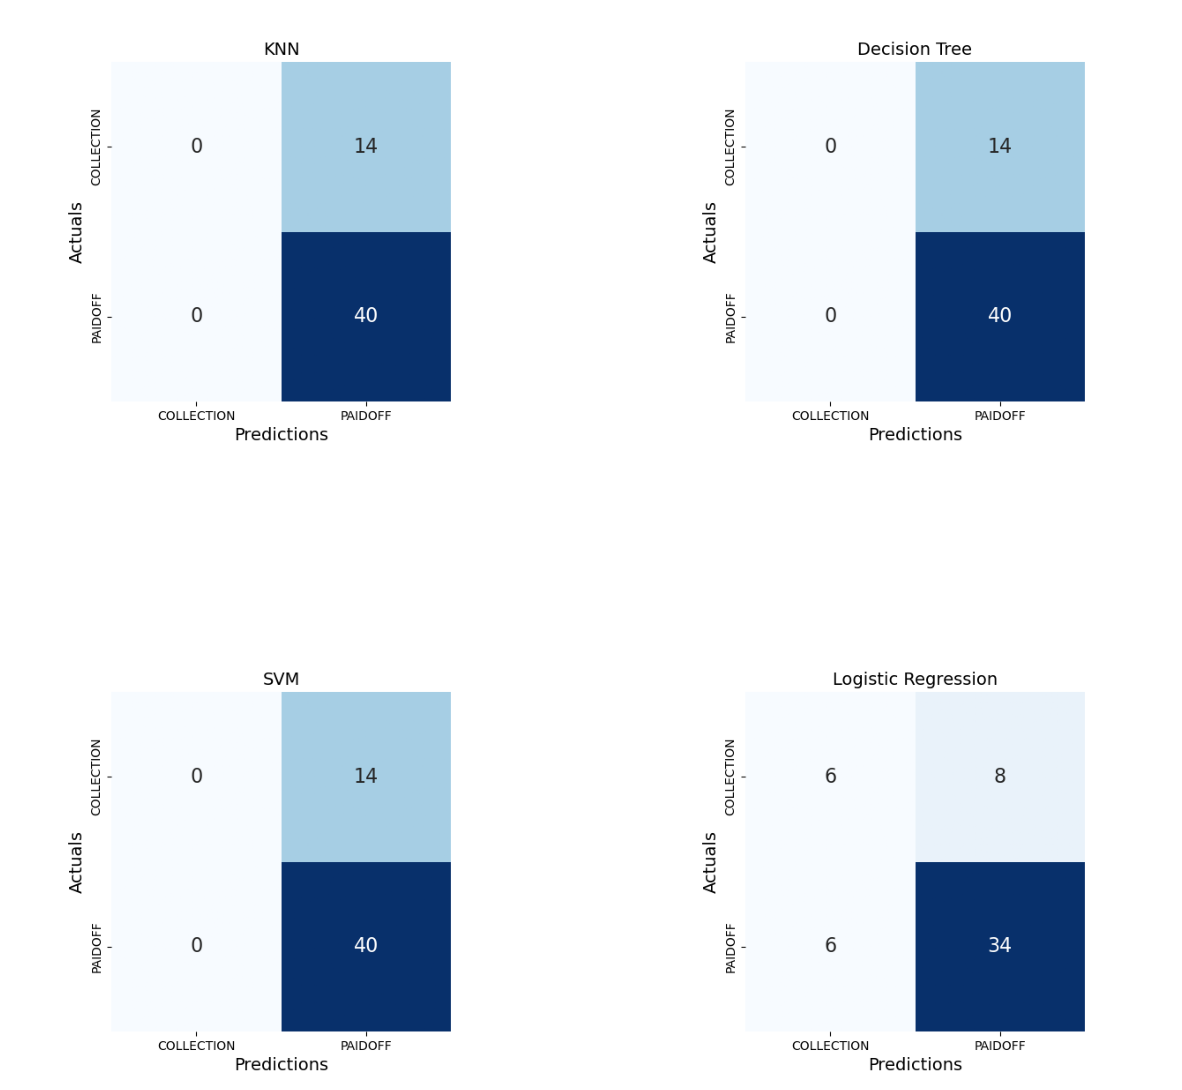

In [54]:
#import cv2
#from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
# create figure
fig = plt.figure(figsize=(15, 15))
# setting values to rows and column variables
rows = 2
columns = 2 
# reading images
Image1 = mpimg.imread('figure1.png')
Image2 = mpimg.imread('figure2.png')
Image3 = mpimg.imread('figure3.png')
Image4 = mpimg.imread('figure4.png')
#img = mpimg.imread('your_image.png')
#imgplot = plt.imshow(Image1)
#plt.show()
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)  
# showing image
#plt.figure()
plt.imshow(Image1)
plt.axis('off')
#plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
#plt.figure()
plt.imshow(Image2)
plt.axis('off')
#plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
#plt.figure()
plt.imshow(Image3)
plt.axis('off')
#plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
#plt.figure()
plt.imshow(Image4)
plt.axis('off')
#plt.title("Fourth")

In [ ]:
#import cv2
#from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
# create figure
fig = plt.figure(figsize=(15, 15))
# setting values to rows and column variables
rows = 2
columns = 2 
# reading images
Image1 = mpimg.imread('figure1.png')
Image2 = mpimg.imread('figure2.png')
Image3 = mpimg.imread('figure3.png')
Image4 = mpimg.imread('figure4.png')
#img = mpimg.imread('your_image.png')
#imgplot = plt.imshow(Image1)
#plt.show()
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)  
# showing image
#plt.figure()
plt.imshow(Image1)
plt.axis('off')
